In [1]:
# Cell 1: Setup, Drive Mount, and Configuration
from google.colab import drive
from google.colab import files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import os

# --- 1. MOUNT GOOGLE DRIVE (Critical Step) ---
# force_remount=True is used for reliable connection
drive.mount('/content/drive', force_remount=True)

# **2. DEFINE SAVE PATH**
# Using your new, corrected folder name: L_GTA_model_DATA
DRIVE_PATH = '/content/drive/MyDrive/Colab Notebooks/L_GTA_model_DATA/'

# --- 3. CONFIGURATION ---
TIME_STEPS = 50
DATASET_NAME = "sf_crime"
N_FEATURES = 1 # Univariate (daily crime count)
# =====================

def create_sequences(data, time_steps):
    """Converts the time series array into overlapping fixed-length sequences."""
    X = []
    # Ensure data is 2D for indexing consistency
    data = data.reshape(-1, N_FEATURES)
    for i in range(len(data) - time_steps + 1):
        X.append(data[i:i + time_steps])
    return np.array(X)

print(f"Configuration set: Sequence Length={TIME_STEPS}, Features={N_FEATURES}")
print(f"Save Path set to: {DRIVE_PATH}")

Mounted at /content/drive
Configuration set: Sequence Length=50, Features=1
Save Path set to: /content/drive/MyDrive/Colab Notebooks/L_GTA_model_DATA/


In [2]:
# Cell 2: File Upload and Initial Load

print("\nPlease upload 'train.csv and test.csv' now.")
try:
    # 1. Prompts for file upload
    uploaded = files.upload()

    # 2. Load the CSV, parsing the 'Dates' column
    # NOTE: We only need 'train.csv' to generate the time series.
    train_df = pd.read_csv('train.csv', parse_dates=['Dates'])

    print("\nFile uploaded and loaded successfully.")
    print(train_df.head())

except KeyError:
    print("❌ ERROR: 'train.csv and test.csv' not found. Please ensure the file was uploaded.")
    exit()


Please upload 'train.csv and test.csv' now.


Saving test.csv to test.csv
Saving train.csv to train.csv

File uploaded and loaded successfully.
                Dates        Category                      Descript  \
0 2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1 2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2 2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3 2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4 2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   

            X          Y  
0 -122.425892  37.774599  


In [3]:
# Cell 3: Daily Count Aggregation and Scaling

# 1. Create a simple daily count (time-series)
train_df['DateOnly'] = train_df['Dates'].dt.date
daily_counts = train_df.groupby('DateOnly').size().reset_index(name='count')

# Convert DateOnly back to datetime for proper scaling and plotting
daily_counts['DateOnly'] = pd.to_datetime(daily_counts['DateOnly'])

# 2. Scale the crime count data (only the 'count' column)
scaler_crime = MinMaxScaler()
crime_counts_scaled = scaler_crime.fit_transform(daily_counts[['count']].values)

print(f"Total Daily Crime Data Points: {len(daily_counts)}")

Total Daily Crime Data Points: 2249


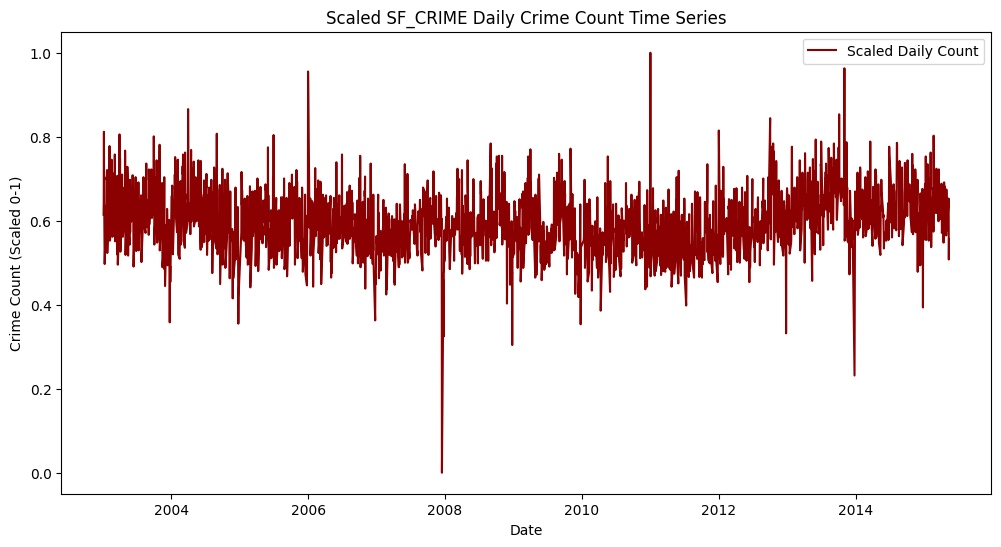

Final Training Data Shape: (1760, 50, 1)
Final Testing Data Shape: (440, 50, 1)


In [4]:
# Cell 4: Visualization, Sequence Creation, and Train/Test Split

# 1. Plotting the scaled data to confirm normalization
plt.figure(figsize=(12, 6))
# We use the original DateOnly index for the x-axis for context
plt.plot(daily_counts['DateOnly'], crime_counts_scaled, label='Scaled Daily Count', color='darkred')
plt.title(f"Scaled {DATASET_NAME.upper()} Daily Crime Count Time Series")
plt.xlabel("Date")
plt.ylabel("Crime Count (Scaled 0-1)")
plt.legend()
plt.show()

# 2. Create the sequences
X_sequences = create_sequences(crime_counts_scaled, TIME_STEPS)

# 3. Train/Test Split
X_train, X_test = train_test_split(X_sequences, test_size=0.2, random_state=42)

print(f"Final Training Data Shape: {X_train.shape}")
print(f"Final Testing Data Shape: {X_test.shape}")

In [5]:
# Cell 5: Final Save to Google Drive

# 1. GUARANTEE THE DIRECTORY EXISTS
try:
    os.makedirs(DRIVE_PATH, exist_ok=True)
    print(f"Verified or created directory: {DRIVE_PATH}")
except Exception as e:
    # This should not fail if Cell 1 was successful.
    print(f"CRITICAL ERROR: Directory access failed. Error: {e}")
    exit()

# 2. SAVE THE ARRAYS
np.save(f'{DRIVE_PATH}{DATASET_NAME}_X_train.npy', X_train)
np.save(f'{DRIVE_PATH}{DATASET_NAME}_X_test.npy', X_test)

print(f"\n✅ Data saved successfully and permanently to Drive:")
print(f"   - {DRIVE_PATH}{DATASET_NAME}_X_train.npy")
print(f"   - {DRIVE_PATH}{DATASET_NAME}_X_test.npy")

Verified or created directory: /content/drive/MyDrive/Colab Notebooks/L_GTA_model_DATA/

✅ Data saved successfully and permanently to Drive:
   - /content/drive/MyDrive/Colab Notebooks/L_GTA_model_DATA/sf_crime_X_train.npy
   - /content/drive/MyDrive/Colab Notebooks/L_GTA_model_DATA/sf_crime_X_test.npy
